In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# df = df_pre.sample(frac=1)
df_pre = pd.read_csv('data/wine.csv')
df = df_pre.sample(frac=1)  # 전체 데이터에서 샘플을 가져온다. 1= 100%, 0.7 = 70%

In [5]:
dataset= df.values
print(dataset.dtype)

float64


In [6]:
X = dataset[:, :12]
Y = dataset[:, 12]

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [11]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_loss',
                              verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
#100까지 참아라


Epoch 00001: val_loss improved from inf to 0.04227, saving model to ./model\01-0.0423.hdf5

Epoch 00002: val_loss improved from 0.04227 to 0.03831, saving model to ./model\02-0.0383.hdf5

Epoch 00003: val_loss improved from 0.03831 to 0.03718, saving model to ./model\03-0.0372.hdf5

Epoch 00004: val_loss did not improve from 0.03718

Epoch 00005: val_loss did not improve from 0.03718

Epoch 00006: val_loss did not improve from 0.03718

Epoch 00007: val_loss improved from 0.03718 to 0.03676, saving model to ./model\07-0.0368.hdf5

Epoch 00008: val_loss did not improve from 0.03676

Epoch 00009: val_loss did not improve from 0.03676

Epoch 00010: val_loss did not improve from 0.03676

Epoch 00011: val_loss did not improve from 0.03676

Epoch 00012: val_loss did not improve from 0.03676

Epoch 00013: val_loss did not improve from 0.03676

Epoch 00014: val_loss did not improve from 0.03676

Epoch 00015: val_loss did not improve from 0.03676

Epoch 00016: val_loss did not improve from 0.03

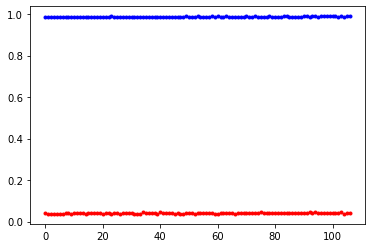

In [14]:
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[checkpointer, early_stopping])
#model.fit(X, Y, epochs=200, batch_size=200)
#print("Accuracy:  %.4f" % (model.evaluate(X, Y)))
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss,'o',c='red',markersize=3)
plt.plot(x_len, y_acc,'o',c='blue',markersize=3)
plt.show()
#print('Accuracy: %.4f' % (model.evaluate(X,Y)[1]))